In [55]:
import pandas as pd
import numpy as np

In [56]:
df=pd.read_csv("C:/Users/sahay/OneDrive/Desktop/ML/Projects/jamboree/notebook/data/raw.csv")

## Data Preprocessing

In [57]:

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
corr_matrix=df.corr()

corr_matrix['Chance of Admit'].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.882559
GRE Score            0.810639
TOEFL Score          0.792549
University Rating    0.690531
SOP                  0.684676
LOR                  0.645972
Research             0.542912
Name: Chance of Admit, dtype: float64

In [59]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [60]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [61]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [62]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_columns=X.columns
std=StandardScaler()
X=std.fit_transform(X)

In [63]:
X

array([[ 1.81761336,  1.77711354,  0.774343  , ...,  1.09652618,
         1.77600627,  0.88841753],
       [ 0.66537316, -0.03351185,  0.774343  , ...,  1.09652618,
         0.48452758,  0.88841753],
       [-0.04369773, -0.52731877, -0.10138125, ...,  0.01510961,
        -0.95596787,  0.88841753],
       ...,
       [-0.39823318, -0.69192108,  0.774343  , ...,  1.63723446,
        -0.24399885, -1.12559688],
       [ 0.93127475,  0.954102  ,  0.774343  , ...,  1.09652618,
         0.76600371, -1.12559688],
       [ 0.93127475,  0.954102  ,  0.774343  , ...,  1.09652618,
         0.76600371, -1.12559688]], shape=(501, 7))

In [64]:
X=pd.DataFrame(X,columns=X_columns)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.817613,1.777114,0.774343,1.134760,1.096526,1.776006,0.888418
1,0.665373,-0.033512,0.774343,0.629862,1.096526,0.484528,0.888418
2,-0.043698,-0.527319,-0.101381,-0.379933,0.015110,-0.955968,0.888418
3,0.488105,0.460295,-0.101381,0.124965,-1.066307,0.153379,0.888418
4,-0.220965,-0.691921,-0.977106,-1.389728,-0.525599,-0.608262,-1.125597


In [65]:
#splitting the data into training and test set
from sklearn.model_selection import train_test_split,KFold
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
386,-1.284572,-1.021126,-0.977106,-0.884831,0.015110,-1.022198,-1.125597
19,-1.195938,-0.856523,-0.101381,0.124965,-0.525599,-0.128097,-1.125597
322,-0.220965,-0.033512,-0.977106,-0.884831,0.555818,-0.508918,-1.125597
332,-0.752769,-0.198114,-0.101381,0.124965,-1.066307,-0.608262,0.888418
56,-0.043698,-0.856523,-0.101381,-1.389728,-0.525599,-1.949413,-1.125597
...,...,...,...,...,...,...,...
106,1.108542,0.624897,0.774343,1.134760,1.096526,0.997808,0.888418
270,-0.930036,-0.362716,-0.977106,-0.884831,-0.525599,-0.591705,0.888418
348,-1.284572,-1.350330,-1.852830,-1.389728,-1.607015,-2.197774,-1.125597
435,-0.664135,-0.362716,-0.977106,-0.884831,0.555818,-1.485805,-1.125597


### Model Development

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso,Ridge


In [68]:
#create an evalute function to give to all metrics after model training
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    r2=r2_score(true,predicted)
    return(mse,r2)

In [69]:
models={
    "LR":LinearRegression(),
    "L1":Lasso(),
    "L2":Ridge()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    #Make Predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate train,validation and test set
    model_train_mse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Trainin Set')
    print("-Mean Squared Error: {:.4f}".format(model_train_mse))
    print("-R2 Score: {:.4f}".format(model_train_r2))

  
    print('--------------------------------')
    print('Model performance for Test Set')
    print("-Mean Squared Error: {:.4f}".format(model_test_mse))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

LR
Model performance for Trainin Set
-Mean Squared Error: 0.0036
-R2 Score: 0.8192
--------------------------------
Model performance for Test Set
-Mean Squared Error: 0.0033
-R2 Score: 0.8308


L1
Model performance for Trainin Set
-Mean Squared Error: 0.0199
-R2 Score: 0.0000
--------------------------------
Model performance for Test Set
-Mean Squared Error: 0.0198
-R2 Score: -0.0107


L2
Model performance for Trainin Set
-Mean Squared Error: 0.0036
-R2 Score: 0.8192
--------------------------------
Model performance for Test Set
-Mean Squared Error: 0.0033
-R2 Score: 0.8308




In [70]:
#hyper parameter tuning
parameters={'alpha':[1,2,5,7,9,11,13]}

In [71]:
#model list for hyper paramter tuning
gridcv_models=[
    ('L1',Lasso(),parameters),
    ('L2',Ridge(),parameters)
]

In [72]:
gridcv_models

[('L1', Lasso(), {'alpha': [1, 2, 5, 7, 9, 11, 13]}),
 ('L2', Ridge(), {'alpha': [1, 2, 5, 7, 9, 11, 13]})]

In [73]:
from sklearn.model_selection import GridSearchCV

model_params={}
for name,models,params in gridcv_models:
    grid_search=GridSearchCV(estimator=model,
                      param_grid=parameters,
                      cv=5,
                      scoring='neg_mean_squared_error')
    
    grid_search.fit(X_train,y_train)
    model_params[name]=grid_search.best_params_

for model_name in model_params:
    print(f"-------------------- Best Params for {model_name}-----------")
    print(model_params[model_name])

-------------------- Best Params for L1-----------
{'alpha': 7}
-------------------- Best Params for L2-----------
{'alpha': 7}


In [74]:
grid_search.fit(X_train,y_train)
print("Best Params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best Params: {'alpha': 7}
Best score: -0.00377715141096035


In [75]:
y_pred=grid_search.predict(X_test)

In [76]:
r2_score=r2_score(y_test_pred,y_test)
r2_score=f"{r2_score * 100:.2f}%" 
r2_score

'80.36%'

### Residuals

In [77]:
residual=y_test.values-y_test_pred
mean_residual=np.mean(residual)
print('mean of residuals{}'.format(mean_residual))

mean of residuals-0.007087420974054343


In [78]:
import seaborn as sns

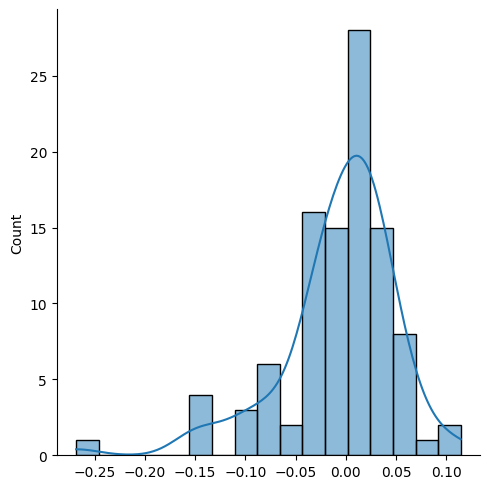

In [79]:
sns.displot(residual,kde=True)

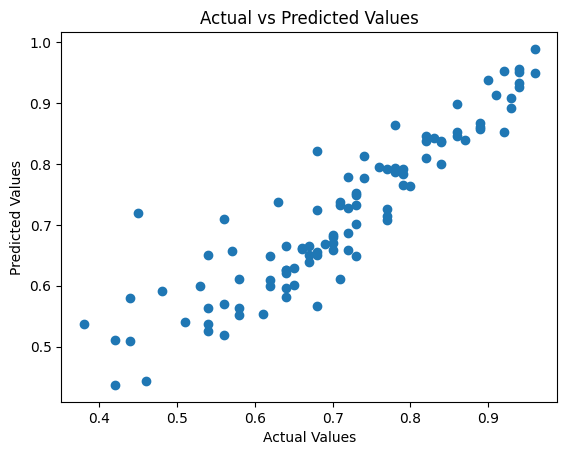

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

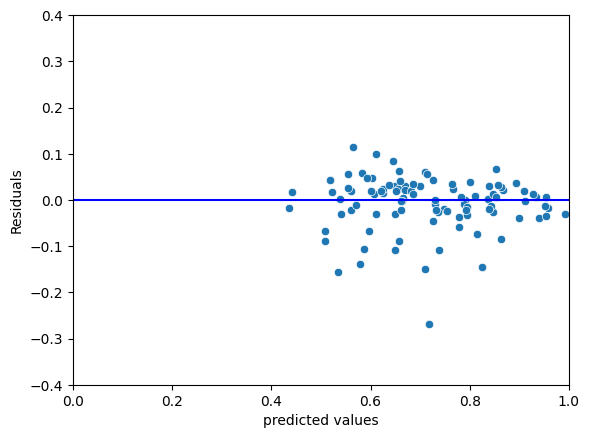

In [81]:
p = sns.scatterplot(x=y_test_pred,y=residual)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot([0,0],color='blue')
